# Final preprocessing

In the final stage of preprocessing organising the data into following intervals: **breakfast-lunch, lunch-dinner, dinner-breakfast**, was the main challenge. Each interval included records about:

- basal insulin delivery (bID)
- pre-meal blood glucose level (BG1)
- after-meal blood glucose level (BG2)
- dietary value (DV)
- short acting insulin delivery (shID)
- step count (SC)
- heart rate (HR)
- outside temperature (Temp)
- humidity (Humid)
- recommended insulin delivery for the interval (Y-shID)

Y-shID was calculated based on pre-meal glucose level (BG1), after-meal glucose level (BG2), short acting insulin delivery (shID) and a target after-meal glucose level of 4.7 mmol/l, set by the patient. However, the target after-meal glucose level can vary from person to person, and even from interval to interval. Having compiled the data frame, it was ready for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('FullData.csv',parse_dates=['Date'])
df.drop_duplicates(ignore_index=True,inplace=True)
df.head(20)

,Date,bID,BG,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,59.64
1,2019-01-08 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-19.3,71.06
2,2019-01-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,65.13
3,2019-01-08 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,59.64
4,2019-01-08 03:30:00,2.0,3.7,0.0,0.0,NaN,NaN,NaN,NaN
5,2019-01-08 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,59.75
6,2019-01-08 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.0,54.87
7,2019-01-08 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,59.64
8,2019-01-08 06:00:00,0.0,3.1,0.0,0.0,NaN,NaN,NaN,NaN
9,2019-01-08 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.9,59.40


## 1. Dealing with missing values

### Removing night time

In [3]:
df = df[(df['Date'].dt.hour>6)&(df['Date'].dt.hour<23)]
df.reset_index(drop=True,inplace=True)
df

,Date,bID,BG,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.9,59.40
1,2019-01-08 07:30:00,0.0,5.2,0.0,3.0,NaN,NaN,NaN,NaN
2,2019-01-08 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,59.64
3,2019-01-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-18.0,64.88
4,2019-01-08 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.2,60.61
...,...,...,...,...,...,...,...,...,...
22162,2021-06-23 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,23.9,53.53
22163,2021-06-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.0,56.66
22164,2021-06-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,21.0,60.23
22165,2021-06-23 22:00:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Temperature and humidity

When the datetime stamp was not in the full hour, temperature and humidity values were missing. To compensate, these values were interpolated.

In [4]:
df[['Temp','Humid']] = df[['Temp','Humid']].interpolate()
df

,Date,bID,BG,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.90,59.400
1,2019-01-08 07:30:00,0.0,5.2,0.0,3.0,NaN,NaN,-16.95,59.520
2,2019-01-08 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.00,59.640
3,2019-01-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-18.00,64.880
4,2019-01-08 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.20,60.610
...,...,...,...,...,...,...,...,...,...
22162,2021-06-23 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,23.90,53.530
22163,2021-06-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22.00,56.660
22164,2021-06-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,21.00,60.230
22165,2021-06-23 22:00:00,0.0,0.0,0.0,0.0,NaN,NaN,20.60,59.515


### Step count and heart rate

To handle missing step counts and the heart rate values, the data was segmented into intervals with the pre-meal blood glucose measurement acting as the interval's starting point. The step count values were then totaled within the interval, with the heart rate value being averaged.

In [5]:
#a list of starting points
ctrl_points = df.index[df['BG']>0]
ctrl_points

Int64Index([    1,    15,    85,   115,   143,   152,   184,   295,   320,
              327,
            ...
            21897, 21904, 21905, 21950, 21996, 22001, 22005, 22083, 22122,
            22160],
           dtype='int64', length=1023)

In [6]:
#totaling the step counts and averaging the heart rate within intervals
for i in range(0,len(ctrl_points)-1):
    df.iloc[ctrl_points[i],5] = df.iloc[ctrl_points[i]:ctrl_points[i+1],5].sum()
    df.iloc[ctrl_points[i],6] = df.iloc[ctrl_points[i]:ctrl_points[i+1],6].mean()

In [7]:
df.head(20)

,Date,bID,BG,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.90,59.400000
1,2019-01-08 07:30:00,0.0,5.2,0.0,3.0,253.0,NaN,-16.95,59.520000
2,2019-01-08 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.00,59.640000
3,2019-01-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-18.00,64.880000
4,2019-01-08 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-17.20,60.610000
5,2019-01-08 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.00,59.920000
6,2019-01-08 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-16.00,54.870000
7,2019-01-08 12:28:49,NaN,NaN,NaN,NaN,34.0,NaN,-16.00,55.181333
8,2019-01-08 12:30:01,NaN,NaN,NaN,NaN,24.0,NaN,-16.00,55.492667
9,2019-01-08 12:31:08,NaN,NaN,NaN,NaN,34.0,NaN,-16.00,55.804000


### The remaining missing values

When control rows (with BG level greater than zero) were filled, the remaining data could be discarded.

In [8]:
df = df[df['BG']>0]

In [9]:
df.reset_index(drop=True,inplace=True)

In [10]:
df

,Date,bID,BG,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:30:00,0.0,5.2,0.000,3.0,253.0,NaN,-16.950000,59.520000
1,2019-01-08 12:40:00,4.0,8.2,0.000,4.0,2502.0,27.219600,-16.000000,57.672000
2,2019-01-08 18:00:00,0.0,5.6,0.000,2.5,385.0,NaN,-15.857143,59.240000
3,2019-01-08 22:36:00,0.0,6.3,0.000,0.0,2221.0,NaN,-16.066667,49.723333
4,2019-01-09 09:00:00,0.0,4.3,0.553,0.0,295.0,NaN,-14.833333,59.410000
...,...,...,...,...,...,...,...,...,...
1018,2021-05-08 22:00:00,1.5,4.8,0.000,0.0,0.0,NaN,5.266667,68.913333
1019,2021-06-01 08:00:00,0.0,4.2,0.230,0.0,11735.0,21.904633,11.850000,85.595000
1020,2021-06-23 08:00:00,0.0,6.3,0.386,3.5,7103.0,21.741500,23.500000,45.370000
1021,2021-06-23 13:00:00,0.0,4.7,0.928,0.0,8274.0,28.638900,28.083333,32.066667


## 2. Creating new features

### After meal blood glucose level (BG2)

In order to calculate Y-shID correctly, it is necessary to measure after meal blood glucose levels four hours after insulin injection. Since there is no record of these values for the purpose of data exploration, the after meal blood glucose is used as the pre meal blood glucose of the subsequent interval (if within the same day only).

In [11]:
df.insert(3, 'BG2',0.0)   

In [12]:
df = df.rename(columns={'BG': 'BG1'})
df

,Date,bID,BG1,BG2,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:30:00,0.0,5.2,0.0,0.000,3.0,253.0,NaN,-16.950000,59.520000
1,2019-01-08 12:40:00,4.0,8.2,0.0,0.000,4.0,2502.0,27.219600,-16.000000,57.672000
2,2019-01-08 18:00:00,0.0,5.6,0.0,0.000,2.5,385.0,NaN,-15.857143,59.240000
3,2019-01-08 22:36:00,0.0,6.3,0.0,0.000,0.0,2221.0,NaN,-16.066667,49.723333
4,2019-01-09 09:00:00,0.0,4.3,0.0,0.553,0.0,295.0,NaN,-14.833333,59.410000
...,...,...,...,...,...,...,...,...,...,...
1018,2021-05-08 22:00:00,1.5,4.8,0.0,0.000,0.0,0.0,NaN,5.266667,68.913333
1019,2021-06-01 08:00:00,0.0,4.2,0.0,0.230,0.0,11735.0,21.904633,11.850000,85.595000
1020,2021-06-23 08:00:00,0.0,6.3,0.0,0.386,3.5,7103.0,21.741500,23.500000,45.370000
1021,2021-06-23 13:00:00,0.0,4.7,0.0,0.928,0.0,8274.0,28.638900,28.083333,32.066667


In [13]:
for i in range(0,len(df.index)-1):
    if (df.iloc[i+1,0]-df.iloc[i,0]).seconds<21600: #check if within the same day (6 hours in between)
        df.iloc[i,3]=df.iloc[i+1,2]

df

,Date,bID,BG1,BG2,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:30:00,0.0,5.2,8.2,0.000,3.0,253.0,NaN,-16.950000,59.520000
1,2019-01-08 12:40:00,4.0,8.2,5.6,0.000,4.0,2502.0,27.219600,-16.000000,57.672000
2,2019-01-08 18:00:00,0.0,5.6,6.3,0.000,2.5,385.0,NaN,-15.857143,59.240000
3,2019-01-08 22:36:00,0.0,6.3,0.0,0.000,0.0,2221.0,NaN,-16.066667,49.723333
4,2019-01-09 09:00:00,0.0,4.3,3.9,0.553,0.0,295.0,NaN,-14.833333,59.410000
...,...,...,...,...,...,...,...,...,...,...
1018,2021-05-08 22:00:00,1.5,4.8,0.0,0.000,0.0,0.0,NaN,5.266667,68.913333
1019,2021-06-01 08:00:00,0.0,4.2,6.3,0.230,0.0,11735.0,21.904633,11.850000,85.595000
1020,2021-06-23 08:00:00,0.0,6.3,4.7,0.386,3.5,7103.0,21.741500,23.500000,45.370000
1021,2021-06-23 13:00:00,0.0,4.7,5.9,0.928,0.0,8274.0,28.638900,28.083333,32.066667


In [14]:
df = df[df['BG2']>0]
df

,Date,bID,BG1,BG2,DV,shID,SC,HR,Temp,Humid
0,2019-01-08 07:30:00,0.0,5.2,8.2,0.000,3.0,253.0,NaN,-16.950000,59.520000
1,2019-01-08 12:40:00,4.0,8.2,5.6,0.000,4.0,2502.0,27.219600,-16.000000,57.672000
2,2019-01-08 18:00:00,0.0,5.6,6.3,0.000,2.5,385.0,NaN,-15.857143,59.240000
4,2019-01-09 09:00:00,0.0,4.3,3.9,0.553,0.0,295.0,NaN,-14.833333,59.410000
5,2019-01-09 13:10:00,0.0,3.9,5.6,1.216,3.3,1473.0,NaN,-11.600000,54.030000
...,...,...,...,...,...,...,...,...,...,...
1016,2021-05-08 13:00:00,0.0,5.0,3.7,0.900,3.0,5924.0,NaN,10.800000,58.256667
1017,2021-05-08 18:30:00,0.0,3.7,4.8,0.366,3.0,0.0,NaN,9.100000,59.300000
1019,2021-06-01 08:00:00,0.0,4.2,6.3,0.230,0.0,11735.0,21.904633,11.850000,85.595000
1020,2021-06-23 08:00:00,0.0,6.3,4.7,0.386,3.5,7103.0,21.741500,23.500000,45.370000


### Recommended insulin delivery Y-shID

Before Y-shID was calculated, rows which did not contain a meal or an insulin delivery were removed, thus indicating that these were either between meals or after dinner. Y-shID was calculated by solving a proportion, where Y-shID divided by shID is equal to BG1 to target BG2 ratio divided by BG1 to actual BG2 ratio.

In [15]:
df = df[(df['DV']>0)&df['shID']>0]
df.reset_index(drop=True,inplace=True)
df

,Date,bID,BG1,BG2,DV,shID,SC,HR,Temp,Humid
0,2019-01-09 13:10:00,0.0,3.9,5.6,1.216,3.3,1473.0,NaN,-11.600000,54.030000
1,2019-01-09 19:05:00,0.0,5.6,6.2,1.172,2.0,7649.0,34.49675,-12.087879,52.386667
2,2019-01-11 07:20:00,0.0,4.6,4.9,0.574,3.5,38.0,NaN,-18.900000,71.030000
3,2019-01-11 12:05:00,0.0,4.9,4.4,0.784,3.5,2516.0,NaN,-14.100000,56.385000
4,2019-01-11 18:00:00,2.0,4.4,5.7,0.868,2.5,4627.0,NaN,-11.857143,54.900714
...,...,...,...,...,...,...,...,...,...,...
393,2021-05-07 07:00:00,0.0,5.3,4.4,0.769,3.0,0.0,NaN,5.066667,85.370000
394,2021-05-07 18:30:00,1.0,4.0,6.1,0.812,3.0,11.0,NaN,11.450000,51.975000
395,2021-05-08 13:00:00,0.0,5.0,3.7,0.900,3.0,5924.0,NaN,10.800000,58.256667
396,2021-05-08 18:30:00,0.0,3.7,4.8,0.366,3.0,0.0,NaN,9.100000,59.300000


In [16]:
df.insert(10, 'Y-shID',((df['BG1']/4.7)*df['shID'])/(df['BG1']/df['BG2'])) 

In [17]:
df

,Date,bID,BG1,BG2,DV,shID,SC,HR,Temp,Humid,Y-shID
0,2019-01-09 13:10:00,0.0,3.9,5.6,1.216,3.3,1473.0,NaN,-11.600000,54.030000,3.931915
1,2019-01-09 19:05:00,0.0,5.6,6.2,1.172,2.0,7649.0,34.49675,-12.087879,52.386667,2.638298
2,2019-01-11 07:20:00,0.0,4.6,4.9,0.574,3.5,38.0,NaN,-18.900000,71.030000,3.648936
3,2019-01-11 12:05:00,0.0,4.9,4.4,0.784,3.5,2516.0,NaN,-14.100000,56.385000,3.276596
4,2019-01-11 18:00:00,2.0,4.4,5.7,0.868,2.5,4627.0,NaN,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...
393,2021-05-07 07:00:00,0.0,5.3,4.4,0.769,3.0,0.0,NaN,5.066667,85.370000,2.808511
394,2021-05-07 18:30:00,1.0,4.0,6.1,0.812,3.0,11.0,NaN,11.450000,51.975000,3.893617
395,2021-05-08 13:00:00,0.0,5.0,3.7,0.900,3.0,5924.0,NaN,10.800000,58.256667,2.361702
396,2021-05-08 18:30:00,0.0,3.7,4.8,0.366,3.0,0.0,NaN,9.100000,59.300000,3.063830


### Sport

It was determined that rows where the step count was relatively small (below 1000), but the heart rate was above average, were likely caused by some form of exercise other than walking. 

In [18]:
df.insert(7, 'Sport',False) 

In [19]:
df.loc[(df['SC']<1000)&(df['HR']>df['HR'].mean()),'Sport'] = True

In [20]:
df[df['Sport'] == True]

,Date,bID,BG1,BG2,DV,shID,SC,Sport,HR,Temp,Humid,Y-shID
38,2019-04-03 12:22:00,0.0,5.4,3.7,3.07,4.0,279.0,True,32.21220,5.750000,29.397500,3.148936
129,2019-05-01 08:30:00,0.0,4.7,4.3,0.62,3.0,908.0,True,34.76095,12.333333,42.776667,2.744681
172,2019-05-19 15:23:00,0.0,5.5,6.0,2.18,4.0,38.0,True,33.48995,18.850000,41.885000,5.106383


In [21]:
df = df.drop(columns='HR')

In [22]:
df

,Date,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
0,2019-01-09 13:10:00,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915
1,2019-01-09 19:05:00,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298
2,2019-01-11 07:20:00,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936
3,2019-01-11 12:05:00,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596
4,2019-01-11 18:00:00,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...
393,2021-05-07 07:00:00,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511
394,2021-05-07 18:30:00,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617
395,2021-05-08 13:00:00,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702
396,2021-05-08 18:30:00,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830


## 3. Removing extremes and final check for missing values

Rug plots were utilized to eliminate extreme values for easy visual outlier detection.

In [23]:
df['BG1'].isna().sum()

0

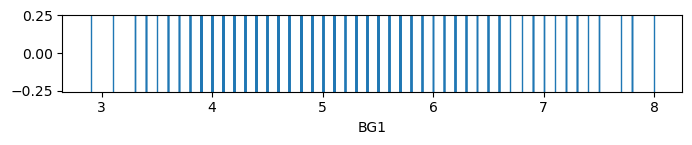

In [24]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='BG1',height=1);

In [25]:
df['DV'].isna().sum()

0

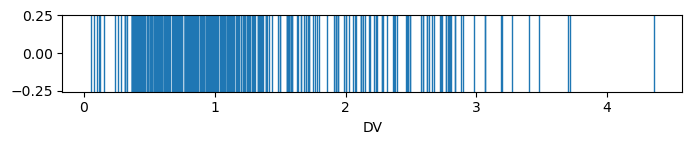

In [26]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='DV',height=1);

In [27]:
df[df['DV']>4]

,Date,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
131,2019-05-01 16:28:00,0.0,3.9,6.4,4.36,4.0,806.0,False,14.25,56.675,5.446809


In [28]:
df.drop(index=131,inplace=True)
df.reset_index(drop=True,inplace=True)

In [29]:
df['bID'].isna().sum()

0

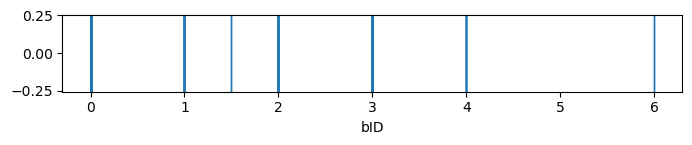

In [30]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='bID',height=1);

In [31]:
df['SC'].isna().sum()

0

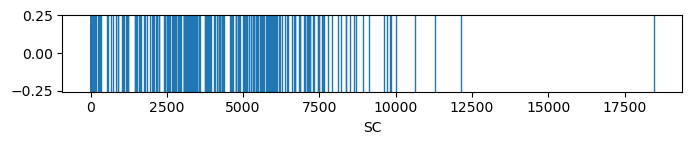

In [32]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='SC',height=1);

In [33]:
df[df['SC']>12500]

,Date,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
340,2019-11-19 12:10:00,0.0,5.9,5.8,1.082,3.0,18467.0,False,-11.6,72.37,3.702128


In [34]:
df.drop(index=340,inplace=True)
df.reset_index(drop=True,inplace=True)

In [35]:
df['Temp'].isna().sum()

0

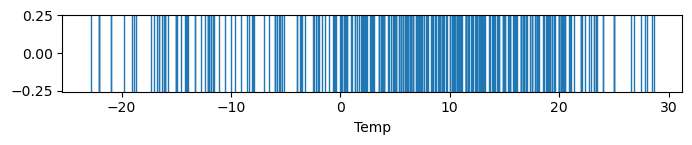

In [36]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='Temp',height=1);

In [37]:
df['Humid'].isna().sum()

0

<AxesSubplot: xlabel='Humid'>

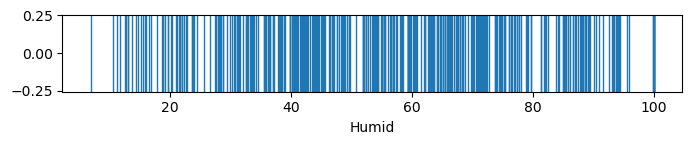

In [38]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='Humid',height=1)

In [39]:
df['Y-shID'].isna().sum()

0

<AxesSubplot: xlabel='Y-shID'>

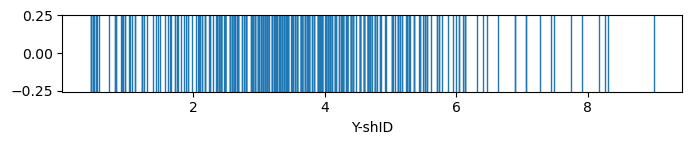

In [40]:
plt.figure(figsize=(8,1))
sns.rugplot(data=df, x='Y-shID',height=1)

In [41]:
df[df['Y-shID']>8]

,Date,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
136,2019-05-05 16:20:00,0.0,6.5,9.6,1.110,4.0,0.0,False,15.400000,32.590000,8.170213
145,2019-05-07 20:00:00,3.0,4.6,9.7,2.840,4.0,0.0,False,6.500000,67.960000,8.255319
283,2019-09-25 07:30:00,0.0,6.4,7.1,0.599,5.5,0.0,False,5.500000,77.750000,8.308511
286,2019-09-30 18:20:00,3.0,5.3,7.7,1.415,5.5,3330.0,False,13.585714,48.887143,9.010638


In [42]:
df.drop(index=[136,145,283,286],inplace=True)
df.reset_index(drop=True,inplace=True)

In [43]:
df

,Date,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
0,2019-01-09 13:10:00,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915
1,2019-01-09 19:05:00,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298
2,2019-01-11 07:20:00,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936
3,2019-01-11 12:05:00,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596
4,2019-01-11 18:00:00,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...
387,2021-05-07 07:00:00,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511
388,2021-05-07 18:30:00,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617
389,2021-05-08 13:00:00,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702
390,2021-05-08 18:30:00,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830


## 4. Assigning interval names

In [44]:
df.insert(1, 'Interval', '')
df

,Date,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
0,2019-01-09 13:10:00,,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915
1,2019-01-09 19:05:00,,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298
2,2019-01-11 07:20:00,,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936
3,2019-01-11 12:05:00,,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596
4,2019-01-11 18:00:00,,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...,...
387,2021-05-07 07:00:00,,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511
388,2021-05-07 18:30:00,,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617
389,2021-05-08 13:00:00,,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702
390,2021-05-08 18:30:00,,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830


In [47]:
df.loc[(df['Date'].dt.hour<10)&(df['Date'].dt.hour>5),'Interval']='breakfast-lunch'
df.loc[(df['Date'].dt.hour>10)&(df['Date'].dt.hour<16),'Interval']='lunch-dinner'
df.loc[(df['Date'].dt.hour>16)&(df['Date'].dt.hour<23),'Interval']='dinner-breakfast'

In [48]:
df[df['Interval']=='']

,Date,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
98,2019-04-21 10:00:00,,0.0,6.5,8.3,1.12,4.0,28.0,False,6.666667,55.613333,7.063830
168,2019-05-19 10:42:00,,0.0,4.8,4.2,0.96,4.0,3573.0,False,14.133333,76.483333,3.574468


In [49]:
df.drop(index=[98,168],inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Date,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
0,2019-01-09 13:10:00,lunch-dinner,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915
1,2019-01-09 19:05:00,dinner-breakfast,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298
2,2019-01-11 07:20:00,breakfast-lunch,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936
3,2019-01-11 12:05:00,lunch-dinner,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596
4,2019-01-11 18:00:00,dinner-breakfast,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021-05-07 07:00:00,breakfast-lunch,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511
386,2021-05-07 18:30:00,dinner-breakfast,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617
387,2021-05-08 13:00:00,lunch-dinner,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702
388,2021-05-08 18:30:00,dinner-breakfast,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830


## 5. Removing time 

In [50]:
df['Date'] = df['Date'].dt.date
df

,Date,Interval,bID,BG1,BG2,DV,shID,SC,Sport,Temp,Humid,Y-shID
0,2019-01-09,lunch-dinner,0.0,3.9,5.6,1.216,3.3,1473.0,False,-11.600000,54.030000,3.931915
1,2019-01-09,dinner-breakfast,0.0,5.6,6.2,1.172,2.0,7649.0,False,-12.087879,52.386667,2.638298
2,2019-01-11,breakfast-lunch,0.0,4.6,4.9,0.574,3.5,38.0,False,-18.900000,71.030000,3.648936
3,2019-01-11,lunch-dinner,0.0,4.9,4.4,0.784,3.5,2516.0,False,-14.100000,56.385000,3.276596
4,2019-01-11,dinner-breakfast,2.0,4.4,5.7,0.868,2.5,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021-05-07,breakfast-lunch,0.0,5.3,4.4,0.769,3.0,0.0,False,5.066667,85.370000,2.808511
386,2021-05-07,dinner-breakfast,1.0,4.0,6.1,0.812,3.0,11.0,False,11.450000,51.975000,3.893617
387,2021-05-08,lunch-dinner,0.0,5.0,3.7,0.900,3.0,5924.0,False,10.800000,58.256667,2.361702
388,2021-05-08,dinner-breakfast,0.0,3.7,4.8,0.366,3.0,0.0,False,9.100000,59.300000,3.063830


In [51]:
df.to_csv('FullData_preprocessed.csv',index=False)